In [141]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
import pandas as pd
import copy
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:\\Users\\liuyuntao\\Desktop\\用户_v5.xlsx", usecols=['gender','age','personincome','familyincome','total','years','repair_zongcishu','zongjine','zonggonlishu','is_repair','driver_zongcishu','type'])
data

,gender,age,personincome,familyincome,total,years,zongjine,repair_zongcishu,zonggonlishu,is_repair,driver_zongcishu,type
0,男,42.0,5001-8000元,10001-15000元,1,1.0,NaN,NaN,NaN,NaN,NaN,0.0
1,男,50.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2,女,28.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,女,28.0,3001-5000元,8001-10000元,1,1.0,NaN,NaN,NaN,NaN,NaN,2.0
4,男,34.0,3000元以下,3001-5000元,1,1.0,NaN,NaN,NaN,NaN,NaN,2.0
5,男,31.0,3001-5000元,8001-10000元,1,1.0,NaN,NaN,NaN,NaN,NaN,2.0
6,男,41.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,14.0,0.0
7,男,34.0,3001-5000元,5001-8000元,1,1.0,NaN,NaN,NaN,NaN,NaN,0.0
8,女,33.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,2.0
9,男,28.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [3]:
data.dtypes

gender               object
age                 float64
personincome         object
familyincome         object
total                 int64
years               float64
zongjine            float64
repair_zongcishu    float64
zonggonlishu        float64
is_repair            object
driver_zongcishu    float64
type                float64
dtype: object

In [4]:
# 取gender，age的第一第二行
# data.loc[1:2,['gender', 'age']]
data = data[(data["age"] < 80) & (data["age"] >= 18)]

In [8]:
data["gender"] = data["gender"].map(lambda x: 1 if x == '男' else 2 if x == '女' else 0)
data['personincome'] = data['personincome'].map(lambda x : 0 if x == '3000元以下' else 1 if x == '3001-5000元' else 2 if x == '5001-8000元'
                                                else 3 if x == '8001-10000元' else 4 if x == '10001-15000元' else 5 if x == '15000元以上' 
                                                else 0)
data['familyincome'] = data['familyincome'].map(lambda x : 0 if x == '3000元以下' else 1 if x == '3001-5000元' else 2 if x == '5001-8000元'
                                                else 3 if x == '8001-10000元' else 4 if x == '10001-15000元' else 5 if x == '15000元以上' 
                                                else 0)
data['is_repair'] = data['is_repair'].map(lambda x : 1 if x == '大修' else 0)
data

C:\Users\liuyuntao\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\liuyuntao\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\liuyuntao\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,gender,age,personincome,familyincome,total,years,zongjine,repair_zongcishu,zonggonlishu,is_repair,driver_zongcishu,type
0,0,42.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,0.0
1,0,50.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,1.0
2,0,28.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,2.0
3,0,28.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,2.0
4,0,34.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,2.0
5,0,31.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,2.0
6,0,41.0,0,0,1,1.0,NaN,NaN,NaN,0,14.0,0.0
7,0,34.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,0.0
8,0,33.0,0,0,1,1.0,NaN,NaN,NaN,0,NaN,2.0
9,0,28.0,0,0,1,NaN,NaN,NaN,NaN,0,NaN,2.0


In [ ]:
# 使用Categorical对 personincome和familyincome进行离散化
# data['personincome'] = pd.Categorical(data['personincome'])
# data['personincome'] = data.personincome.cat.codes

# data['familyincome'] = pd.Categorical(data['familyincome'])
# data['familyincome'] = data.familyincome.cat.codes

In [9]:
user_info = data.fillna(0)
user_info

,gender,age,personincome,familyincome,total,years,zongjine,repair_zongcishu,zonggonlishu,is_repair,driver_zongcishu,type
0,0,42.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,0.0
1,0,50.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,1.0
2,0,28.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,2.0
3,0,28.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,2.0
4,0,34.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,2.0
5,0,31.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,2.0
6,0,41.0,0,0,1,1.0,0.0,0.0,0.0,0,14.0,0.0
7,0,34.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,0.0
8,0,33.0,0,0,1,1.0,0.0,0.0,0.0,0,0.0,2.0
9,0,28.0,0,0,1,0.0,0.0,0.0,0.0,0,0.0,2.0


In [10]:
user_info.describe()

,gender,age,personincome,familyincome,total,years,zongjine,repair_zongcishu,zonggonlishu,is_repair,driver_zongcishu,type
count,376852.0,376852.000000,376852.0,376852.0,376852.000000,376852.000000,376852.000000,376852.000000,3.768520e+05,376852.000000,376852.000000,376852.000000
mean,0.0,41.088961,0.0,0.0,1.000005,3.039676,549.925207,2.264881,1.800235e+04,0.004092,0.033992,1.586108
std,0.0,9.208996,0.0,0.0,0.002304,2.437027,1697.712928,3.727808,9.025897e+05,0.063836,0.388546,0.677950
min,0.0,18.000000,0.0,0.0,1.000000,0.000000,-270.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.0,34.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,0.0,40.000000,0.0,0.0,1.000000,3.000000,0.000000,1.000000,2.381000e+03,0.000000,0.000000,2.000000
75%,0.0,47.000000,0.0,0.0,1.000000,5.000000,415.000000,3.000000,2.325100e+04,0.000000,0.000000,2.000000
max,0.0,79.000000,0.0,0.0,2.000000,7.000000,98335.000000,507.000000,5.537170e+08,1.000000,29.000000,2.000000


In [11]:
user_info_copy = user_info.copy()

In [12]:
user_info_train = user_info[user_info['type'].astype('int') < 2]

In [ ]:
# # 删除指定列所在的行
# data=data.dropna(subset=['years'])
# data

In [13]:
train_to_array = np.array(user_info_train)
train_to_array.shape

(115082, 12)

In [14]:
X = train_to_array[:, :11]
X

array([[   0.,   42.,    0., ...,    0.,    0.,    0.],
       [   0.,   50.,    0., ...,    0.,    0.,    0.],
       [   0.,   41.,    0., ...,    0.,    0.,   14.],
       ...,
       [   0.,   39.,    0., ..., 2378.,    0.,    0.],
       [   0.,   45.,    0., ..., 3122.,    0.,    0.],
       [   0.,   50.,    0., ..., 4195.,    0.,    0.]])

In [15]:
y = train_to_array[:, 11:12]
y

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [171]:
# model = Sequential()
# model.add(Dense(32, activation='sigmoid', input_shape=(11,))) # sigmoid
# # model.add(Dropout(0.5))
# model.add(Dense(1, activation='relu'))
# model.summary()
# kernel_initializer='he_normal',
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu',  input_shape=(11, )),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_31 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


In [172]:
# 如果 targets 是 one-hot 编码，用 categorical_crossentropy
# 如果 tagets 是 数字编码 ，用 sparse_categorical_crossentropy

optimizer = tf.train.AdadeltaOptimizer(learning_rate=1)
model.compile(loss='mae', optimizer=optimizer, metrics=['accuracy'])

Train on 73652 samples, validate on 18413 samples
Epoch 1/10
73652/73652 [==============================] - 4s 53us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.3571 - val_acc: 0.6429
Epoch 2/10
73652/73652 [==============================] - 3s 42us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.3571 - val_acc: 0.6429
Epoch 3/10
73652/73652 [==============================] - 3s 41us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.3571 - val_acc: 0.6429
Epoch 4/10
73652/73652 [==============================] - 2s 33us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.3571 - val_acc: 0.6429
Epoch 5/10
73652/73652 [==============================] - 3s 42us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.3571 - val_acc: 0.6429
Epoch 6/10
73652/73652 [==============================] - 3s 35us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.3571 - val_acc: 0.6429
Epoch 7/10
73652/73652 [==============================] - 4s 50us/sample - loss: 0.3550 - acc: 0.6450 - val_loss: 0.

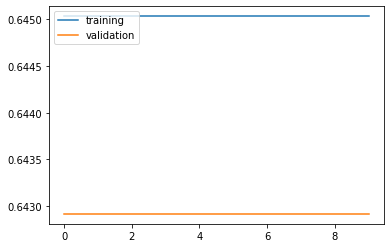

In [173]:
# model.fit(X_train, y_train, batch_size=32, epochs=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle = True)
history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [113]:
history.__dict__